# Scholarship Data Analysis and Missing Data Detection

This notebook analyzes scholarship data from the `scholarship_data` directory to:
- Identify missing or incomplete data fields
- Generate data quality reports
- Visualize missing data patterns
- Provide insights for improving data collection from scholarship websites

## Overview
We will analyze scholarship data from multiple sources to understand data completeness and identify areas for improvement in the scraping process.

## 1. Import Required Libraries
Importing necessary libraries for data analysis, visualization, and file handling.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Scholarship Data
Loading scholarship data from the `scholarship_data` directory (excluding backup data).

In [45]:
# Define the path to scholarship data (using only unique data)
SCHOLARSHIP_DATA_PATH = 'scholarship_data'
UNIQUE_DATA_FILE = 'unique_scholarships.csv'

def load_unique_scholarship_data():
    """
    Load only the unique scholarship data from unique_scholarships.csv.
    This ensures we analyze only deduplicated, high-quality data.
    """
    unique_file_path = os.path.join(SCHOLARSHIP_DATA_PATH, UNIQUE_DATA_FILE)
    
    # Check if scholarship_data directory exists
    if not os.path.exists(SCHOLARSHIP_DATA_PATH):
        print(f"Warning: {SCHOLARSHIP_DATA_PATH} directory not found!")
        return None
    
    # Check if unique_scholarships.csv exists
    if not os.path.exists(unique_file_path):
        print(f"Warning: {UNIQUE_DATA_FILE} not found in {SCHOLARSHIP_DATA_PATH}!")
        return None
    
    print(f"Loading unique scholarship data from: {UNIQUE_DATA_FILE}")
    return unique_file_path

# Load the unique data file
unique_data_path = load_unique_scholarship_data()
print(f"Data file path: {unique_data_path if unique_data_path else 'Not found'}")

Loading unique scholarship data from: unique_scholarships.csv
Data file path: scholarship_data\unique_scholarships.csv


In [46]:
# Load unique scholarship data into DataFrame
unique_scholarships = pd.DataFrame()

if unique_data_path:
    try:
        unique_scholarships = pd.read_csv(unique_data_path)
        print(f"Successfully loaded {UNIQUE_DATA_FILE}: {len(unique_scholarships)} records")
        print(f"Columns: {len(unique_scholarships.columns)}")
        print(f"Column names: {list(unique_scholarships.columns)}")
    except Exception as e:
        print(f"Error loading {UNIQUE_DATA_FILE}: {str(e)}")

# Display basic info about loaded data
print("\n=== Unique Data Loading Summary ===")
if not unique_scholarships.empty:
    print(f"Dataset: {len(unique_scholarships)} rows, {len(unique_scholarships.columns)} columns")
    print(f"Memory usage: {unique_scholarships.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("-" * 50)
else:
    print("No data loaded!")

Successfully loaded unique_scholarships.csv: 164 records
Columns: 13
Column names: ['Title', 'Description', 'Link', 'Official Link', 'Image', 'Deadline', 'Eligibility', 'Host Country', 'Host University', 'Program Duration', 'Degree Offered', 'Region', 'Post_at']

=== Unique Data Loading Summary ===
Dataset: 164 rows, 13 columns
Memory usage: 0.67 MB
--------------------------------------------------


## 3. Working with Unique Scholarship Data
Using only the unique_scholarships.csv file to ensure we analyze deduplicated, high-quality data without redundancy.

In [47]:
# Work with unique scholarship data only
all_scholarships = unique_scholarships.copy()

if not all_scholarships.empty:
    # Remove Image column from analysis as requested
    if 'Image' in all_scholarships.columns:
        all_scholarships = all_scholarships.drop('Image', axis=1)
        print("✅ Excluded 'Image' field from analysis")
    
    # Add source file information for consistency with rest of analysis
    all_scholarships['source_file'] = UNIQUE_DATA_FILE
    
    print(f"=== Unique Scholarship Dataset Overview ===")
    print(f"Total unique scholarships: {len(all_scholarships)}")
    print(f"Total columns (excluding Image): {len(all_scholarships.columns)}")
    
    # Check date range if Post_at column exists
    if 'Post_at' in all_scholarships.columns:
        print(f"Date range: {all_scholarships['Post_at'].min()} to {all_scholarships['Post_at'].max()}")
    
    # Display first few rows
    print("\nFirst 3 records:")
    display(all_scholarships.head(3))
    
    print(f"\n✅ Analysis will be performed on {len(all_scholarships)} unique scholarship records")
    print("📝 Note: Image field has been excluded from the analysis")
else:
    print("❌ No unique scholarship data available to analyze!")
    print("Please ensure unique_scholarships.csv exists in the scholarship_data directory.")

✅ Excluded 'Image' field from analysis
=== Unique Scholarship Dataset Overview ===
Total unique scholarships: 164
Total columns (excluding Image): 13
Date range: 2025-06-10 to September 4, 2024

First 3 records:


,Title,Description,Link,Official Link,Deadline,Eligibility,Host Country,Host University,Program Duration,Degree Offered,Region,Post_at,source_file
0,Mandela Rhodes Scholarship for African Student...,The Mandela Rhodes Scholarship 2026 is a fully...,https://scholarshipscorner.website/mandela-rho...,https://mandela-rhodes.embark.com/login/apply?...,All interested candidates can apply till21 Apr...,Open to citizens of any African country.Applic...,South Africa,NaN,Honours Degree Program-1 yearMaster’s Degree P...,Honours Degree ProgramMaster’s Degree Program,Africa,2025-06-10,unique_scholarships.csv
1,Global Opportunities with deadlines in October...,Do you want to study and gain international ex...,https://scholarshipscorner.website/global-oppo...,https://scholarshipscorner.website/how-to-appl...,NaN,NaN,NaN,NaN,NaN,NaN,Africa,2025-06-10,unique_scholarships.csv
2,International opportunities with deadlines in ...,"If you aspire to gain global experience, explo...",https://scholarshipscorner.website/internation...,NaN,NaN,NaN,NaN,NaN,NaN,Host Country:China.Host University:Tsinghua Un...,Africa,2025-06-10,unique_scholarships.csv



✅ Analysis will be performed on 164 unique scholarship records
📝 Note: Image field has been excluded from the analysis


## 4. Analyze Scholarship Data Structure
Analyzing the structure and completeness of scholarship data fields.

In [48]:
# Analyze data structure and missing values
if not all_scholarships.empty:
    print("=== Data Structure Analysis ===")
    
    # Basic statistics
    print(f"Dataset shape: {all_scholarships.shape}")
    print(f"Memory usage: {all_scholarships.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Column information
    print("\n=== Column Information ===")
    for col in all_scholarships.columns:
        dtype = all_scholarships[col].dtype
        non_null = all_scholarships[col].count()
        null_count = all_scholarships[col].isnull().sum()
        null_pct = (null_count / len(all_scholarships)) * 100
        
        print(f"{col:20} | {str(dtype):10} | Non-null: {non_null:4} | Missing: {null_count:4} ({null_pct:5.1f}%)")
    
    # Data types
    print("\n=== Data Types ===")
    print(all_scholarships.dtypes)

=== Data Structure Analysis ===
Dataset shape: (164, 13)
Memory usage: 0.66 MB

=== Column Information ===
Title                | object     | Non-null:  164 | Missing:    0 (  0.0%)
Description          | object     | Non-null:  164 | Missing:    0 (  0.0%)
Link                 | object     | Non-null:  164 | Missing:    0 (  0.0%)
Official Link        | object     | Non-null:  140 | Missing:   24 ( 14.6%)
Deadline             | object     | Non-null:  142 | Missing:   22 ( 13.4%)
Eligibility          | object     | Non-null:  127 | Missing:   37 ( 22.6%)
Host Country         | object     | Non-null:  134 | Missing:   30 ( 18.3%)
Host University      | object     | Non-null:   86 | Missing:   78 ( 47.6%)
Program Duration     | object     | Non-null:  106 | Missing:   58 ( 35.4%)
Degree Offered       | object     | Non-null:   97 | Missing:   67 ( 40.9%)
Region               | object     | Non-null:  164 | Missing:    0 (  0.0%)
Post_at              | object     | Non-null:  164 | Miss

## 5. Missing Data Analysis
Identifying patterns and extent of missing data across different fields.

In [49]:
# Missing data analysis
if not all_scholarships.empty:
    # Calculate missing data statistics
    missing_data = pd.DataFrame({
        'Column': all_scholarships.columns,
        'Missing_Count': all_scholarships.isnull().sum(),
        'Missing_Percentage': (all_scholarships.isnull().sum() / len(all_scholarships)) * 100,
        'Data_Type': all_scholarships.dtypes
    })
    
    # Sort by missing percentage
    missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
    
    print("=== Missing Data Summary ===")
    print(missing_data)
    
    # Identify critical fields with high missing rates
    critical_missing = missing_data[missing_data['Missing_Percentage'] > 50]
    if not critical_missing.empty:
        print("\n=== Critical Missing Data (>50%) ===")
        for _, row in critical_missing.iterrows():
            print(f"⚠️  {row['Column']}: {row['Missing_Percentage']:.1f}% missing")
    
    # Identify fields with no missing data
    complete_fields = missing_data[missing_data['Missing_Percentage'] == 0]
    if not complete_fields.empty:
        print("\n=== Complete Fields (0% missing) ===")
        for _, row in complete_fields.iterrows():
            print(f"✅ {row['Column']}: Complete data")

=== Missing Data Summary ===
                            Column  Missing_Count  Missing_Percentage  \
Host University    Host University             78           47.560976   
Degree Offered      Degree Offered             67           40.853659   
Program Duration  Program Duration             58           35.365854   
Eligibility            Eligibility             37           22.560976   
Host Country          Host Country             30           18.292683   
Official Link        Official Link             24           14.634146   
Deadline                  Deadline             22           13.414634   
Title                        Title              0            0.000000   
Description            Description              0            0.000000   
Link                          Link              0            0.000000   
Region                      Region              0            0.000000   
Post_at                    Post_at              0            0.000000   
source_file           

=== Missing Data Visualizations ===
Creating individual charts for detailed analysis...



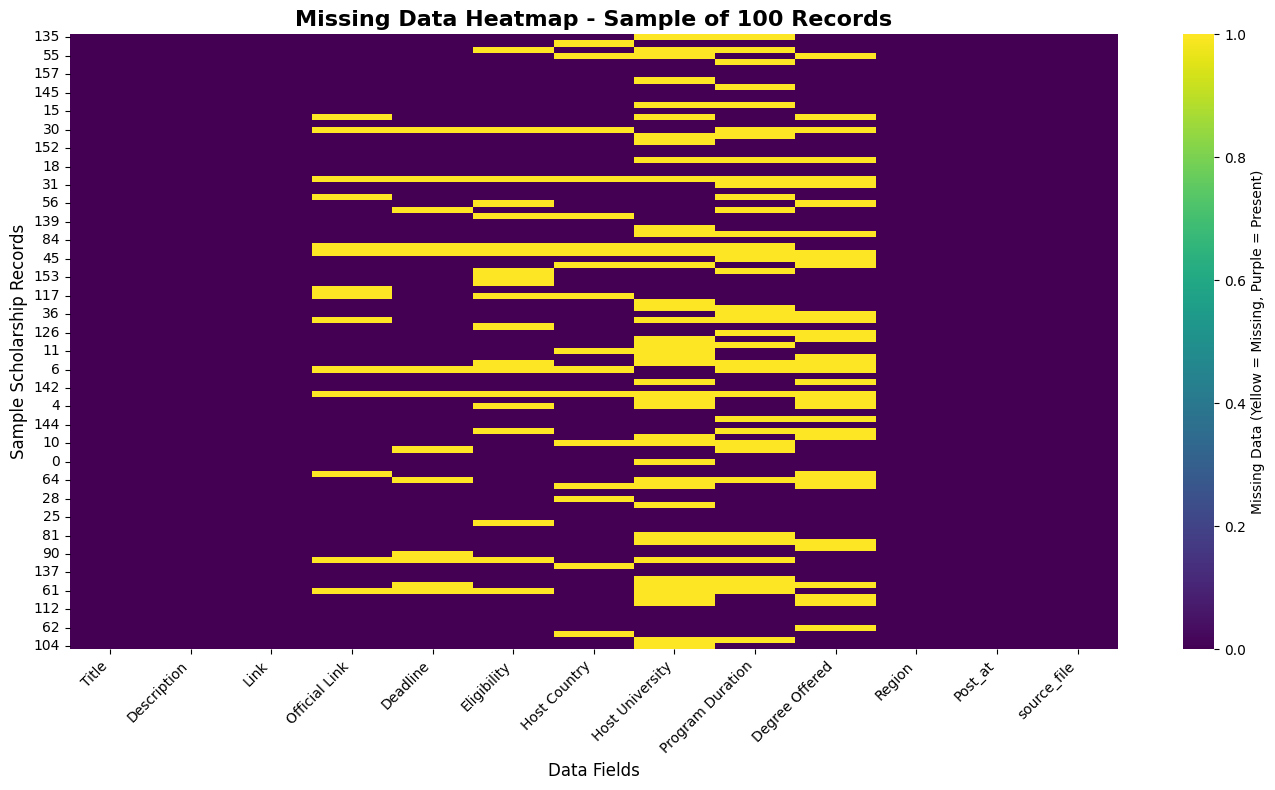

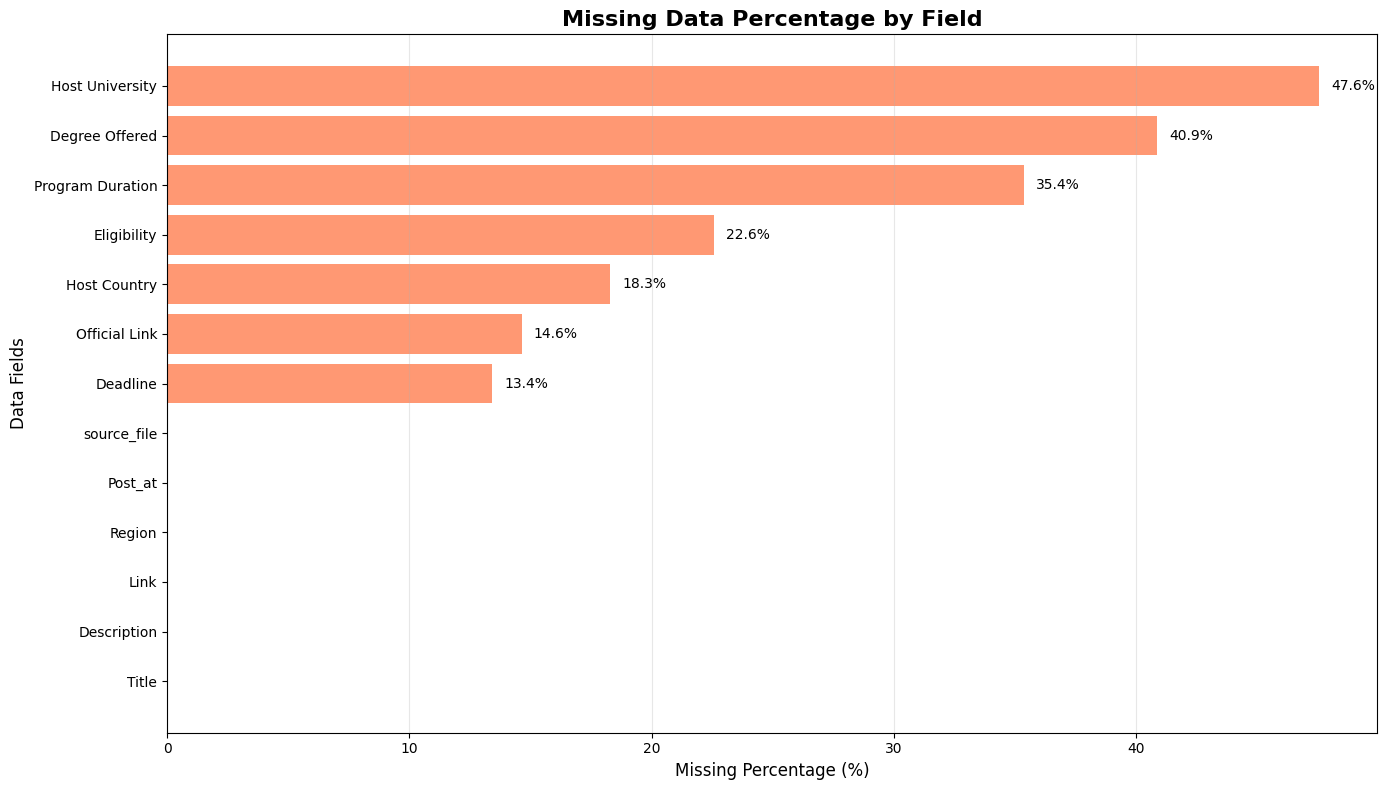

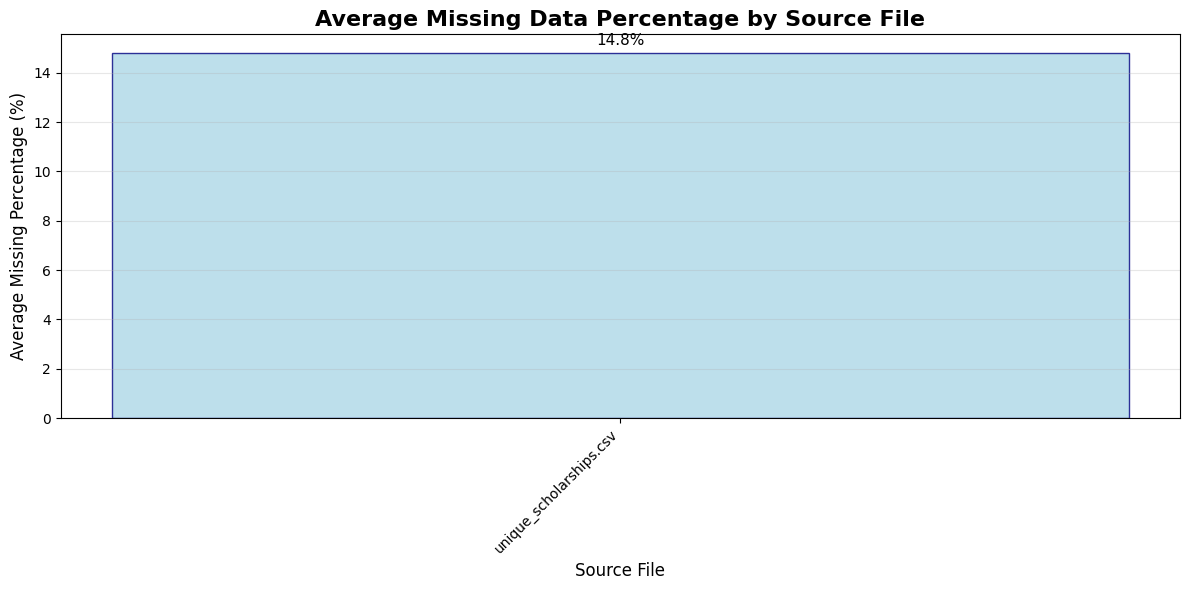

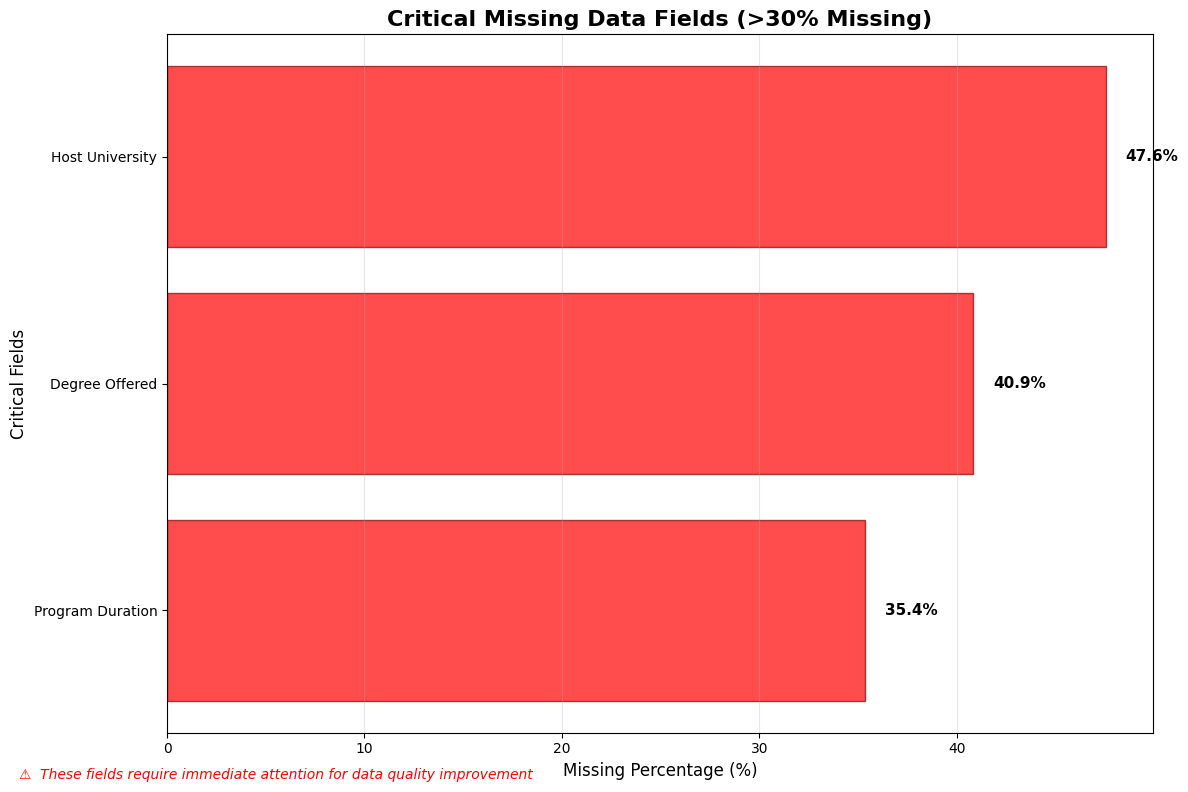


📊 All missing data visualizations have been generated successfully!
Each chart focuses on a specific aspect of data quality for better analysis.


In [50]:
# Visualize missing data patterns - Breaking into separate charts for better analysis
if not all_scholarships.empty:
    print("=== Missing Data Visualizations ===")
    print("Creating individual charts for detailed analysis...\n")
    
    # Calculate missing percentages for reuse
    missing_pct = (all_scholarships.isnull().sum() / len(all_scholarships)) * 100
    
    # Chart 1: Missing Data Heatmap
    plt.figure(figsize=(14, 8))
    if len(all_scholarships) <= 100:
        sns.heatmap(all_scholarships.isnull(), cbar=True, cmap='viridis', 
                   cbar_kws={'label': 'Missing Data (Yellow = Missing, Purple = Present)'})
        plt.title('Missing Data Heatmap - All Records', fontsize=16, fontweight='bold')
        plt.xlabel('Data Fields', fontsize=12)
        plt.ylabel('Scholarship Records', fontsize=12)
    else:
        sample_data = all_scholarships.sample(n=100, random_state=42)
        sns.heatmap(sample_data.isnull(), cbar=True, cmap='viridis',
                   cbar_kws={'label': 'Missing Data (Yellow = Missing, Purple = Present)'})
        plt.title('Missing Data Heatmap - Sample of 100 Records', fontsize=16, fontweight='bold')
        plt.xlabel('Data Fields', fontsize=12)
        plt.ylabel('Sample Scholarship Records', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Chart 2: Missing Data Percentage Bar Chart
    plt.figure(figsize=(14, 8))
    missing_pct_sorted = missing_pct.sort_values(ascending=True)
    bars = plt.barh(range(len(missing_pct_sorted)), missing_pct_sorted.values, color='coral', alpha=0.8)
    plt.yticks(range(len(missing_pct_sorted)), missing_pct_sorted.index)
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Data Fields', fontsize=12)
    plt.title('Missing Data Percentage by Field', fontsize=16, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add percentage labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}%', ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Chart 3: Data Completeness by Source File
    plt.figure(figsize=(12, 6))
    if 'source_file' in all_scholarships.columns:
        completeness_by_source = all_scholarships.groupby('source_file').apply(
            lambda x: ((x.isnull().sum() / len(x)) * 100).mean()
        )
        bars = plt.bar(range(len(completeness_by_source)), completeness_by_source.values, 
                      color='lightblue', alpha=0.8, edgecolor='navy')
        plt.xticks(range(len(completeness_by_source)), completeness_by_source.index, rotation=45, ha='right')
        plt.ylabel('Average Missing Percentage (%)', fontsize=12)
        plt.xlabel('Source File', fontsize=12)
        plt.title('Average Missing Data Percentage by Source File', fontsize=16, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=11)
    else:
        plt.text(0.5, 0.5, 'Source file information not available', 
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
        plt.title('Data Completeness by Source File', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Chart 4: Critical Missing Data Fields (>30%)
    plt.figure(figsize=(12, 8))
    critical_fields = missing_pct[missing_pct > 30].sort_values(ascending=True)
    if not critical_fields.empty:
        bars = plt.barh(range(len(critical_fields)), critical_fields.values, 
                       color='red', alpha=0.7, edgecolor='darkred')
        plt.yticks(range(len(critical_fields)), critical_fields.index)
        plt.xlabel('Missing Percentage (%)', fontsize=12)
        plt.ylabel('Critical Fields', fontsize=12)
        plt.title('Critical Missing Data Fields (>30% Missing)', fontsize=16, fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        
        # Add percentage labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')
        
        # Add warning text
        plt.figtext(0.02, 0.02, '⚠️  These fields require immediate attention for data quality improvement', 
                   fontsize=10, style='italic', color='red')
    else:
        plt.text(0.5, 0.5, '✅ Excellent! No critical missing data\n(all fields have <30% missing data)', 
                ha='center', va='center', transform=plt.gca().transAxes, 
                fontsize=14, color='green', fontweight='bold')
        plt.title('Critical Missing Data Fields (>30% Missing)', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 All missing data visualizations have been generated successfully!")
    print("Each chart focuses on a specific aspect of data quality for better analysis.")

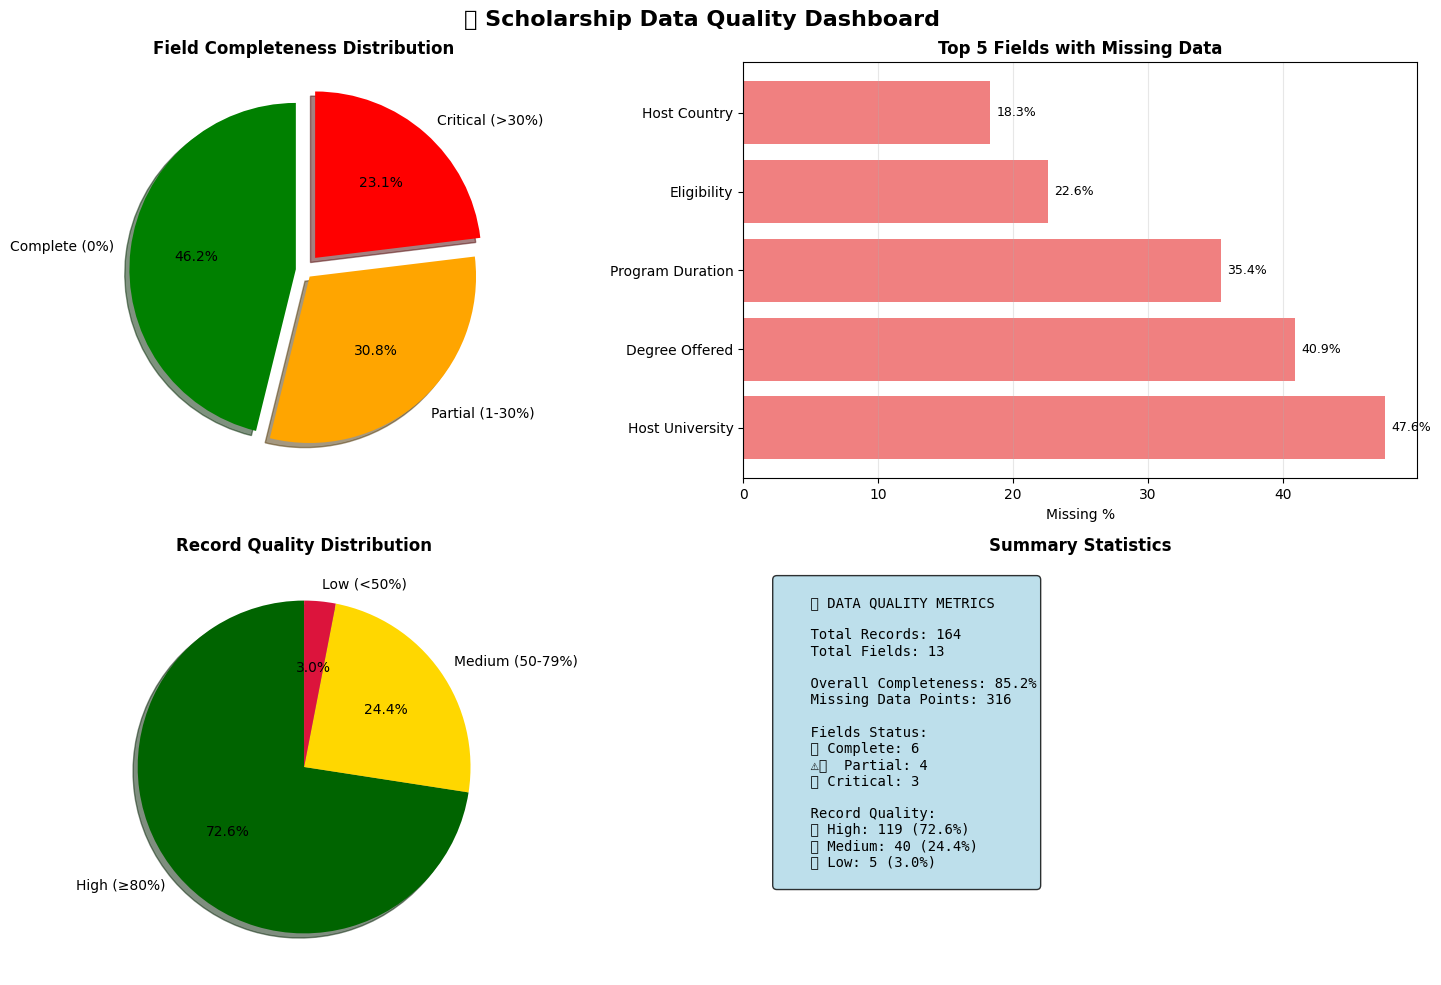


🎯 Data Quality Dashboard generated successfully!
This overview provides a comprehensive view of your scholarship data quality.


In [51]:
# Additional Chart: Data Quality Summary Overview
if not all_scholarships.empty:
    plt.figure(figsize=(15, 10))
    
    # Create a 2x2 subplot for summary metrics
    
    # Subplot 1: Field Completeness Overview
    plt.subplot(2, 2, 1)
    complete_fields = (missing_pct == 0).sum()
    partial_fields = ((missing_pct > 0) & (missing_pct <= 30)).sum()
    critical_fields = (missing_pct > 30).sum()
    
    labels = ['Complete (0%)', 'Partial (1-30%)', 'Critical (>30%)']
    sizes = [complete_fields, partial_fields, critical_fields]
    colors = ['green', 'orange', 'red']
    explode = (0.05, 0.05, 0.1)  # explode the critical slice
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
           startangle=90, explode=explode, shadow=True)
    plt.title('Field Completeness Distribution', fontweight='bold')
    
    # Subplot 2: Top Missing Fields
    plt.subplot(2, 2, 2)
    top_missing = missing_pct.nlargest(5)
    bars = plt.barh(range(len(top_missing)), top_missing.values, color='lightcoral')
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Missing %')
    plt.title('Top 5 Fields with Missing Data', fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=9)
    
    # Subplot 3: Record Quality Distribution
    plt.subplot(2, 2, 3)
    record_completeness = []
    for idx, row in all_scholarships.iterrows():
        completeness = (row.count() / len(row)) * 100
        record_completeness.append(completeness)
    
    record_completeness = pd.Series(record_completeness)
    high_quality = (record_completeness >= 80).sum()
    medium_quality = ((record_completeness >= 50) & (record_completeness < 80)).sum()
    low_quality = (record_completeness < 50).sum()
    
    quality_labels = ['High (≥80%)', 'Medium (50-79%)', 'Low (<50%)']
    quality_counts = [high_quality, medium_quality, low_quality]
    quality_colors = ['darkgreen', 'gold', 'crimson']
    
    plt.pie(quality_counts, labels=quality_labels, colors=quality_colors, 
           autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title('Record Quality Distribution', fontweight='bold')
    
    # Subplot 4: Overall Statistics
    plt.subplot(2, 2, 4)
    total_cells = all_scholarships.shape[0] * all_scholarships.shape[1]
    missing_cells = all_scholarships.isnull().sum().sum()
    completeness_score = ((total_cells - missing_cells) / total_cells) * 100
    
    stats_text = f"""
    📊 DATA QUALITY METRICS
    
    Total Records: {len(all_scholarships):,}
    Total Fields: {len(all_scholarships.columns)}
    
    Overall Completeness: {completeness_score:.1f}%
    Missing Data Points: {missing_cells:,}
    
    Fields Status:
    ✅ Complete: {complete_fields}
    ⚠️  Partial: {partial_fields}
    🚨 Critical: {critical_fields}
    
    Record Quality:
    🟢 High: {high_quality} ({high_quality/len(all_scholarships)*100:.1f}%)
    🟡 Medium: {medium_quality} ({medium_quality/len(all_scholarships)*100:.1f}%)
    🔴 Low: {low_quality} ({low_quality/len(all_scholarships)*100:.1f}%)
    """
    
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    plt.axis('off')
    plt.title('Summary Statistics', fontweight='bold')
    
    plt.suptitle('📈 Scholarship Data Quality Dashboard', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 Data Quality Dashboard generated successfully!")
    print("This overview provides a comprehensive view of your scholarship data quality.")

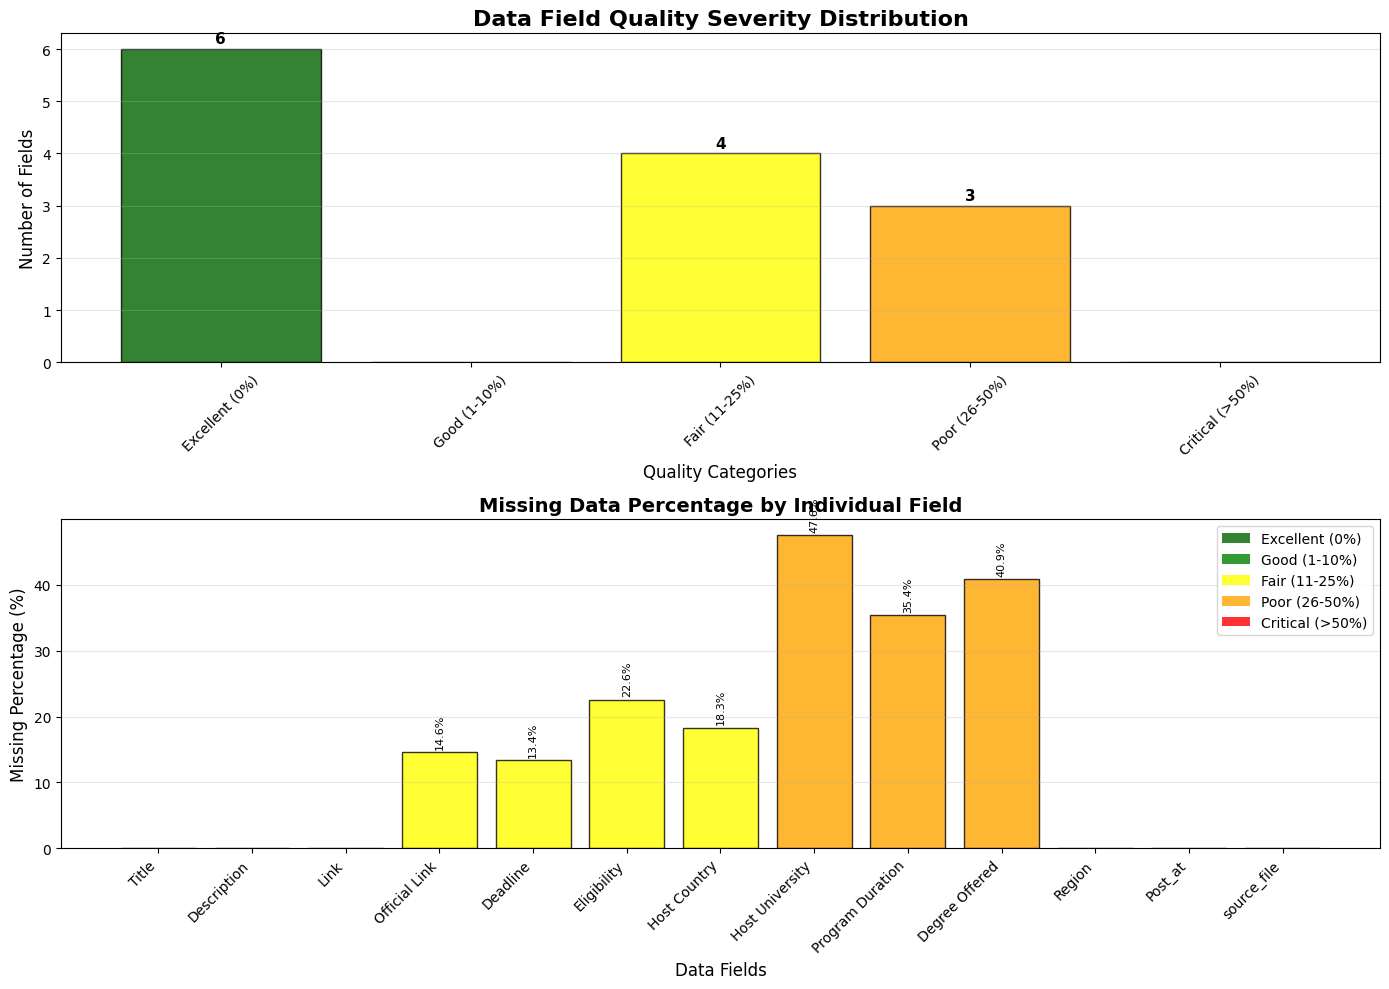


🎯 DATA QUALITY SEVERITY ANALYSIS:
   Excellent (0%): 6 fields (46.2%)
   Fair (11-25%): 4 fields (30.8%)
   Poor (26-50%): 3 fields (23.1%)

📋 FIELD-BY-FIELD BREAKDOWN:
   Title: 0.0% missing - ✅ Excellent
   Description: 0.0% missing - ✅ Excellent
   Link: 0.0% missing - ✅ Excellent
   Official Link: 14.6% missing - 🟡 Fair
   Deadline: 13.4% missing - 🟡 Fair
   Eligibility: 22.6% missing - 🟡 Fair
   Host Country: 18.3% missing - 🟡 Fair
   Host University: 47.6% missing - 🟠 Poor
   Program Duration: 35.4% missing - 🟠 Poor
   Degree Offered: 40.9% missing - 🟠 Poor
   Region: 0.0% missing - ✅ Excellent
   Post_at: 0.0% missing - ✅ Excellent
   source_file: 0.0% missing - ✅ Excellent


In [52]:
# Chart: Missing Data Severity Analysis
if not all_scholarships.empty:
    plt.figure(figsize=(14, 10))
    
    # Create severity analysis
    severity_ranges = {
        'Excellent (0%)': (missing_pct == 0).sum(),
        'Good (1-10%)': ((missing_pct > 0) & (missing_pct <= 10)).sum(),
        'Fair (11-25%)': ((missing_pct > 10) & (missing_pct <= 25)).sum(),
        'Poor (26-50%)': ((missing_pct > 25) & (missing_pct <= 50)).sum(),
        'Critical (>50%)': (missing_pct > 50).sum()
    }
    
    # Main chart - Severity distribution
    plt.subplot(2, 1, 1)
    categories = list(severity_ranges.keys())
    counts = list(severity_ranges.values())
    colors = ['darkgreen', 'green', 'yellow', 'orange', 'red']
    
    bars = plt.bar(categories, counts, color=colors, alpha=0.8, edgecolor='black')
    plt.title('Data Field Quality Severity Distribution', fontsize=16, fontweight='bold')
    plt.ylabel('Number of Fields', fontsize=12)
    plt.xlabel('Quality Categories', fontsize=12)
    
    # Add count labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    
    # Bottom chart - Field-by-field analysis
    plt.subplot(2, 1, 2)
    field_colors = []
    for pct in missing_pct.values:
        if pct == 0:
            field_colors.append('darkgreen')
        elif pct <= 10:
            field_colors.append('green')
        elif pct <= 25:
            field_colors.append('yellow')
        elif pct <= 50:
            field_colors.append('orange')
        else:
            field_colors.append('red')
    
    bars = plt.bar(range(len(missing_pct)), missing_pct.values, 
                  color=field_colors, alpha=0.8, edgecolor='black')
    plt.title('Missing Data Percentage by Individual Field', fontsize=14, fontweight='bold')
    plt.xlabel('Data Fields', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.xticks(range(len(missing_pct)), missing_pct.index, rotation=45, ha='right')
    
    # Add percentage labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    
    plt.grid(axis='y', alpha=0.3)
    
    # Add legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='darkgreen', alpha=0.8, label='Excellent (0%)'),
        plt.Rectangle((0,0),1,1, facecolor='green', alpha=0.8, label='Good (1-10%)'),
        plt.Rectangle((0,0),1,1, facecolor='yellow', alpha=0.8, label='Fair (11-25%)'),
        plt.Rectangle((0,0),1,1, facecolor='orange', alpha=0.8, label='Poor (26-50%)'),
        plt.Rectangle((0,0),1,1, facecolor='red', alpha=0.8, label='Critical (>50%)')
    ]
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()
    
    # Print severity summary
    print("\n🎯 DATA QUALITY SEVERITY ANALYSIS:")
    for category, count in severity_ranges.items():
        if count > 0:
            percentage = (count / len(missing_pct)) * 100
            print(f"   {category}: {count} fields ({percentage:.1f}%)")
    
    print("\n📋 FIELD-BY-FIELD BREAKDOWN:")
    for field, pct in missing_pct.items():
        if pct == 0:
            status = "✅ Excellent"
        elif pct <= 10:
            status = "🟢 Good"
        elif pct <= 25:
            status = "🟡 Fair"
        elif pct <= 50:
            status = "🟠 Poor"
        else:
            status = "🔴 Critical"
        print(f"   {field}: {pct:.1f}% missing - {status}")

### 5.1 Individual Missing Data Visualizations
The following charts break down the missing data analysis into separate, focused visualizations for better understanding and actionability.

## 6. Field-Specific Analysis
Analyzing individual fields to understand data quality and patterns.

In [53]:
# Field-specific analysis
if not all_scholarships.empty:
    print("=== Field-Specific Analysis ===")
    print("Note: Image field excluded from analysis as requested\n")
    
    # Essential scholarship fields (excluding Image)
    essential_fields = ['Title', 'Description', 'Link', 'Official Link', 'Deadline', 
                       'Eligibility', 'Host Country', 'Degree Offered']
    
    for field in essential_fields:
        if field in all_scholarships.columns:
            missing_count = all_scholarships[field].isnull().sum()
            missing_pct = (missing_count / len(all_scholarships)) * 100
            
            print(f"\n--- {field} ---")
            print(f"Missing: {missing_count}/{len(all_scholarships)} ({missing_pct:.1f}%)")
            
            if field == 'Title':
                # Title analysis
                non_null_titles = all_scholarships[field].dropna()
                if not non_null_titles.empty:
                    avg_length = non_null_titles.str.len().mean()
                    print(f"Average title length: {avg_length:.1f} characters")
                    print(f"Shortest title: {non_null_titles.str.len().min()} chars")
                    print(f"Longest title: {non_null_titles.str.len().max()} chars")
            
            elif field == 'Host Country':
                # Country analysis
                if not all_scholarships[field].isnull().all():
                    countries = all_scholarships[field].value_counts().head(10)
                    print(f"Top countries: {list(countries.index)}")
            
            elif field == 'Deadline':
                # Deadline analysis
                non_null_deadlines = all_scholarships[field].dropna()
                if not non_null_deadlines.empty:
                    unique_formats = non_null_deadlines.apply(lambda x: len(str(x))).value_counts()
                    print(f"Deadline format variations: {len(unique_formats)} different lengths")
            
            elif field == 'Region':
                # Region analysis
                if not all_scholarships[field].isnull().all():
                    regions = all_scholarships[field].value_counts()
                    print(f"Regions found: {list(regions.index)}")

=== Field-Specific Analysis ===
Note: Image field excluded from analysis as requested


--- Title ---
Missing: 0/164 (0.0%)
Average title length: 62.7 characters
Shortest title: 44 chars
Longest title: 86 chars

--- Description ---
Missing: 0/164 (0.0%)

--- Link ---
Missing: 0/164 (0.0%)

--- Official Link ---
Missing: 24/164 (14.6%)

--- Deadline ---
Missing: 22/164 (13.4%)
Deadline format variations: 79 different lengths

--- Eligibility ---
Missing: 37/164 (22.6%)

--- Host Country ---
Missing: 30/164 (18.3%)
Top countries: ['Australia', 'UK', 'Canada', 'Germany', 'China', 'Japan', 'United Kingdom', 'Uk', 'Italy', 'Saudia Arabia']

--- Degree Offered ---
Missing: 67/164 (40.9%)


## 7. Data Quality Metrics
Calculating overall data quality scores and completeness metrics.

=== Data Quality Metrics ===
Overall Data Completeness: 85.18%
Total data points: 2,132
Missing data points: 316

=== Record-Level Quality ===
Average record completeness: 85.18%
Best record completeness: 100.00%
Worst record completeness: 46.15%

=== Quality Distribution ===
High quality records (≥80%): 119 (72.6%)
Medium quality records (50-79%): 40 (24.4%)
Low quality records (<50%): 5 (3.0%)


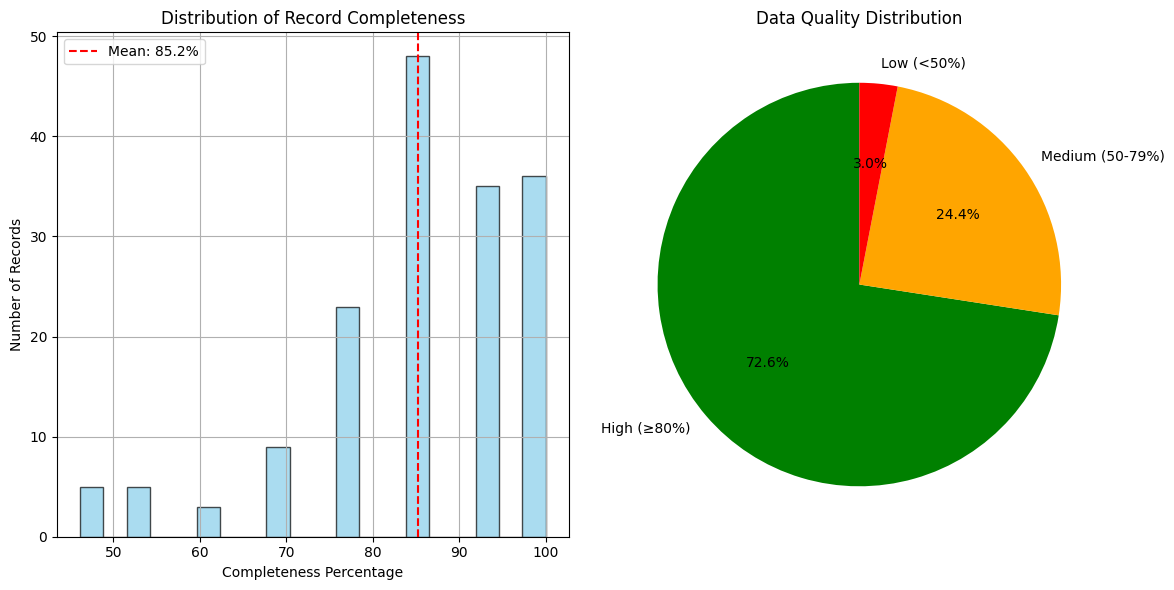

In [54]:
# Data Quality Metrics
if not all_scholarships.empty:
    print("=== Data Quality Metrics ===")
    
    # Overall completeness score
    total_cells = all_scholarships.shape[0] * all_scholarships.shape[1]
    missing_cells = all_scholarships.isnull().sum().sum()
    completeness_score = ((total_cells - missing_cells) / total_cells) * 100
    
    print(f"Overall Data Completeness: {completeness_score:.2f}%")
    print(f"Total data points: {total_cells:,}")
    print(f"Missing data points: {missing_cells:,}")
    
    # Quality score by record
    record_completeness = []
    for idx, row in all_scholarships.iterrows():
        non_null_count = row.count()
        total_fields = len(row)
        completeness = (non_null_count / total_fields) * 100
        record_completeness.append(completeness)
    
    record_completeness = pd.Series(record_completeness)
    
    print(f"\n=== Record-Level Quality ===")
    print(f"Average record completeness: {record_completeness.mean():.2f}%")
    print(f"Best record completeness: {record_completeness.max():.2f}%")
    print(f"Worst record completeness: {record_completeness.min():.2f}%")
    
    # Records with high/low completeness
    high_quality = (record_completeness >= 80).sum()
    medium_quality = ((record_completeness >= 50) & (record_completeness < 80)).sum()
    low_quality = (record_completeness < 50).sum()
    
    print(f"\n=== Quality Distribution ===")
    print(f"High quality records (≥80%): {high_quality} ({high_quality/len(all_scholarships)*100:.1f}%)")
    print(f"Medium quality records (50-79%): {medium_quality} ({medium_quality/len(all_scholarships)*100:.1f}%)")
    print(f"Low quality records (<50%): {low_quality} ({low_quality/len(all_scholarships)*100:.1f}%)")
    
    # Visualize quality distribution
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    record_completeness.hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(record_completeness.mean(), color='red', linestyle='--', label=f'Mean: {record_completeness.mean():.1f}%')
    plt.xlabel('Completeness Percentage')
    plt.ylabel('Number of Records')
    plt.title('Distribution of Record Completeness')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    quality_labels = ['High (≥80%)', 'Medium (50-79%)', 'Low (<50%)']
    quality_counts = [high_quality, medium_quality, low_quality]
    colors = ['green', 'orange', 'red']
    plt.pie(quality_counts, labels=quality_labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Data Quality Distribution')
    
    plt.tight_layout()
    plt.show()

## 8. Website Source Analysis
Analyzing data quality by source website to identify which sources provide better data.
**Note**: This analysis is based on unique scholarship data only, ensuring no duplicates affect the results.

=== Website Source Analysis ===
Source Quality Ranking:
                        Source  Record_Count  Avg_Completeness  Best_Record  Worst_Record
   Europe-OpportunitiesCorners            18         97.863248   100.000000     92.307692
                            UK            16         96.634615   100.000000     84.615385
Australia-OpportunitiesCorners            14         93.956044   100.000000     76.923077
                        Canada            11         91.608392   100.000000     69.230769
                   Middle East            13         83.431953   100.000000     69.230769
                          Asia            25         81.846154   100.000000     61.538462
     Europe-ScholarshipsCorner            30         79.743590    92.307692     46.153846
                     Australia            25         79.692308    92.307692     46.153846
                        Africa            12         68.589744    92.307692     46.153846


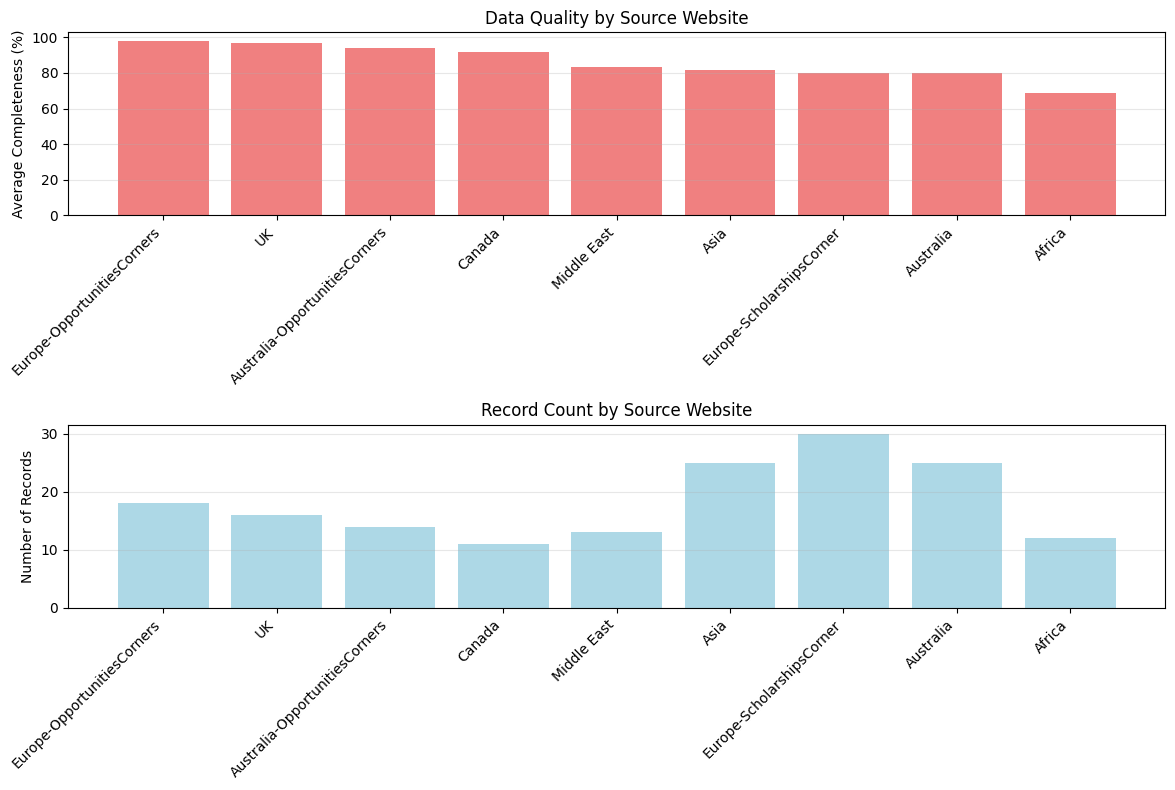

In [55]:
# Website Source Analysis
if not all_scholarships.empty and 'Region' in all_scholarships.columns:
    print("=== Website Source Analysis ===")
    
    # Analyze by Region (which seems to contain source info)
    source_analysis = []
    
    for source in all_scholarships['Region'].dropna().unique():
        source_data = all_scholarships[all_scholarships['Region'] == source]
        
        # Calculate completeness for this source
        source_completeness = []
        for idx, row in source_data.iterrows():
            non_null_count = row.count()
            total_fields = len(row)
            completeness = (non_null_count / total_fields) * 100
            source_completeness.append(completeness)
        
        avg_completeness = np.mean(source_completeness) if source_completeness else 0
        
        source_analysis.append({
            'Source': source,
            'Record_Count': len(source_data),
            'Avg_Completeness': avg_completeness,
            'Best_Record': max(source_completeness) if source_completeness else 0,
            'Worst_Record': min(source_completeness) if source_completeness else 0
        })
    
    source_df = pd.DataFrame(source_analysis)
    source_df = source_df.sort_values('Avg_Completeness', ascending=False)
    
    print("Source Quality Ranking:")
    print(source_df.to_string(index=False))
    
    # Visualize source comparison
    if len(source_df) > 1:
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 1, 1)
        plt.bar(range(len(source_df)), source_df['Avg_Completeness'], color='lightcoral')
        plt.xticks(range(len(source_df)), source_df['Source'], rotation=45, ha='right')
        plt.ylabel('Average Completeness (%)')
        plt.title('Data Quality by Source Website')
        plt.grid(axis='y', alpha=0.3)
        
        plt.subplot(2, 1, 2)
        plt.bar(range(len(source_df)), source_df['Record_Count'], color='lightblue')
        plt.xticks(range(len(source_df)), source_df['Source'], rotation=45, ha='right')
        plt.ylabel('Number of Records')
        plt.title('Record Count by Source Website')
        plt.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

## 9. Recommendations for Data Improvement
Based on the analysis of unique scholarship data, here are recommendations to improve data collection and quality.

In [56]:
# Generate recommendations based on analysis
if not all_scholarships.empty:
    print("=== RECOMMENDATIONS FOR DATA IMPROVEMENT ===")
    print("Note: Image field excluded from analysis as requested")
    print("\n🎯 PRIORITY IMPROVEMENTS:")
    
    # Identify most problematic fields
    missing_data = pd.DataFrame({
        'Column': all_scholarships.columns,
        'Missing_Percentage': (all_scholarships.isnull().sum() / len(all_scholarships)) * 100
    }).sort_values('Missing_Percentage', ascending=False)
    
    critical_fields = missing_data[missing_data['Missing_Percentage'] > 30]
    
    if not critical_fields.empty:
        print("\n1. CRITICAL MISSING FIELDS (>30% missing):")
        for _, row in critical_fields.iterrows():
            field = row['Column']
            missing_pct = row['Missing_Percentage']
            print(f"   • {field}: {missing_pct:.1f}% missing")
            
            # Specific recommendations by field (excluding Image)
            if field == 'Host University':
                print("     → Improve university name extraction from scholarship descriptions")
            elif field == 'Deadline':
                print("     → Enhance date parsing and standardization")
            elif field == 'Program Duration':
                print("     → Look for duration info in description text")
            elif field == 'Official Link':
                print("     → Improve official link detection and validation")
            # Note: Image field recommendations removed as requested
    
    print("\n2. WEBSITE-SPECIFIC IMPROVEMENTS:")
    if 'Region' in all_scholarships.columns:
        # Analyze sources
        for source in all_scholarships['Region'].dropna().unique():
            source_data = all_scholarships[all_scholarships['Region'] == source]
            source_missing = (source_data.isnull().sum() / len(source_data)) * 100
            avg_missing = source_missing.mean()
            
            if avg_missing > 20:
                print(f"   • {source}: {avg_missing:.1f}% average missing data")
                worst_fields = source_missing.nlargest(3)
                print(f"     → Focus on: {', '.join(worst_fields.index)}")
    
    print("\n3. TECHNICAL RECOMMENDATIONS:")
    print("   • Implement retry mechanisms for failed data extractions")
    print("   • Add data validation rules before saving to CSV")
    print("   • Create fallback extraction methods for critical fields")
    print("   • Implement real-time data quality monitoring")
    print("   • Add logging for failed field extractions")
    
    print("\n4. DATA STANDARDIZATION:")
    print("   • Standardize date formats for deadlines")
    print("   • Create controlled vocabulary for countries and regions")
    print("   • Normalize degree type classifications")
    print("   • Implement text cleaning for description fields")
    
    print("\n5. MONITORING & ALERTS:")
    print("   • Set up alerts when data completeness drops below 70%")
    print("   • Monitor scraping success rates by website")
    print("   • Track changes in website structures that affect scraping")
    print("   • Regular data quality audits and reports")
    
    # Calculate improvement potential
    current_completeness = ((all_scholarships.shape[0] * all_scholarships.shape[1] - all_scholarships.isnull().sum().sum()) / (all_scholarships.shape[0] * all_scholarships.shape[1])) * 100
    
    print(f"\n📊 CURRENT STATUS:")
    print(f"   • Overall data completeness: {current_completeness:.2f}%")
    print(f"   • Potential improvement: {100 - current_completeness:.2f} percentage points")
    print(f"   • Total missing data points: {all_scholarships.isnull().sum().sum():,}")
    print(f"   • Note: Image field excluded from calculations")

=== RECOMMENDATIONS FOR DATA IMPROVEMENT ===
Note: Image field excluded from analysis as requested

🎯 PRIORITY IMPROVEMENTS:

1. CRITICAL MISSING FIELDS (>30% missing):
   • Host University: 47.6% missing
     → Improve university name extraction from scholarship descriptions
   • Degree Offered: 40.9% missing
   • Program Duration: 35.4% missing
     → Look for duration info in description text

2. WEBSITE-SPECIFIC IMPROVEMENTS:
   • Africa: 31.4% average missing data
     → Focus on: Host University, Host Country, Program Duration
   • Europe-ScholarshipsCorner: 20.3% average missing data
     → Focus on: Degree Offered, Host University, Program Duration
   • Australia: 20.3% average missing data
     → Focus on: Host University, Program Duration, Degree Offered

3. TECHNICAL RECOMMENDATIONS:
   • Implement retry mechanisms for failed data extractions
   • Add data validation rules before saving to CSV
   • Create fallback extraction methods for critical fields
   • Implement real-ti

## 10. Export Analysis Results
Saving the analysis results from unique scholarship data for further reference and action planning.

In [57]:
# Export analysis results
if not all_scholarships.empty:
    # Create analysis summary
    analysis_summary = {
        'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'data_source': 'unique_scholarships.csv (deduplicated data)',
        'total_unique_records': len(all_scholarships),
        'total_fields': len(all_scholarships.columns),
        'overall_completeness': ((all_scholarships.shape[0] * all_scholarships.shape[1] - all_scholarships.isnull().sum().sum()) / (all_scholarships.shape[0] * all_scholarships.shape[1])) * 100,
        'critical_fields': list(missing_data[missing_data['Missing_Percentage'] > 30]['Column']),
        'data_sources': list(all_scholarships['Region'].dropna().unique()) if 'Region' in all_scholarships.columns else []
    }
    
    # Save missing data report
    missing_data_report = pd.DataFrame({
        'Field': all_scholarships.columns,
        'Missing_Count': all_scholarships.isnull().sum(),
        'Missing_Percentage': (all_scholarships.isnull().sum() / len(all_scholarships)) * 100,
        'Data_Type': all_scholarships.dtypes,
        'Priority': ['High' if x > 30 else 'Medium' if x > 10 else 'Low' for x in (all_scholarships.isnull().sum() / len(all_scholarships)) * 100]
    }).sort_values('Missing_Percentage', ascending=False)
    
    # Save to CSV
    output_filename = f"unique_data_quality_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    missing_data_report.to_csv(output_filename, index=False)
    
    print(f"=== UNIQUE DATA ANALYSIS COMPLETE ===")
    print(f"📁 Data quality report saved to: {output_filename}")
    print(f"📊 Analysis summary for unique scholarship data:")
    for key, value in analysis_summary.items():
        print(f"   • {key}: {value}")
    
    print("\n✅ Unique data analysis complete! Use the recommendations above to improve your scholarship data collection.")
    print("🔍 This analysis focused on deduplicated data to provide accurate quality metrics.")
else:
    print("❌ No unique data available for analysis. Please ensure unique_scholarships.csv exists in the scholarship_data directory.")

=== UNIQUE DATA ANALYSIS COMPLETE ===
📁 Data quality report saved to: unique_data_quality_report_20250610_235408.csv
📊 Analysis summary for unique scholarship data:
   • analysis_date: 2025-06-10 23:54:08
   • data_source: unique_scholarships.csv (deduplicated data)
   • total_unique_records: 164
   • total_fields: 13
   • overall_completeness: 85.17823639774859
   • critical_fields: ['Host University', 'Degree Offered', 'Program Duration']
   • data_sources: ['Africa', 'Europe-OpportunitiesCorners', 'Europe-ScholarshipsCorner', 'Asia', 'Australia', 'Australia-OpportunitiesCorners', 'Middle East', 'UK', 'Canada']

✅ Unique data analysis complete! Use the recommendations above to improve your scholarship data collection.
🔍 This analysis focused on deduplicated data to provide accurate quality metrics.
